<a href="https://colab.research.google.com/github/Indhraneel14inks/my_projects/blob/master/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
file = pd.read_csv("Position_Salaries.csv")
X = file.iloc[:, 1:-1].values
y = file.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X1= sc1.fit_transform(X)
y1= sc2.fit_transform(y)

In [9]:
print(X1)
print(y1)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(X1,y1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [11]:
sc2.inverse_transform(svr.predict(sc1.transform([[7.5]])))

array([263740.85328003])

## Visualising the SVR results

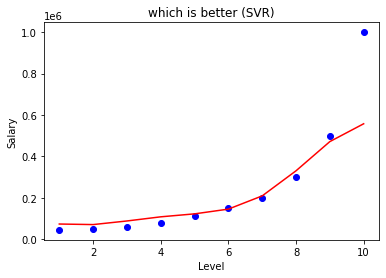

In [12]:
plt.scatter(X, y, color = "blue")
plt.plot(X,sc2.inverse_transform(svr.predict(X1)), color = "red")
plt.title("which is better (SVR)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

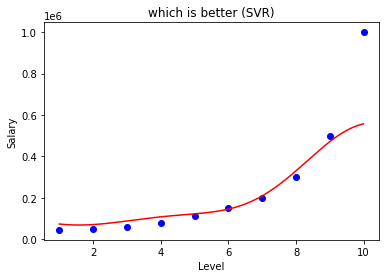

In [14]:
X_smooth = np.arange(min(X), max(X), 0.01)
X_smooth = X_smooth.reshape(len(X_smooth), 1)
plt.scatter(X, y, color = "blue")
plt.plot(X_smooth ,sc2.inverse_transform(svr.predict(sc1.transform(X_smooth))), color = "red")
plt.title("which is better (SVR)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()
